In [1]:
import numpy
import matplotlib
import matplotlib.pyplot as plt

In [2]:
def mcol(v):
    return v.reshape((v.size, 1))

def load(fname):
    DList = []
    labelsList = []
    hLabels = {
        'Iris-setosa': 0,
        'Iris-versicolor': 1,
        'Iris-virginica': 2
        }

    with open(fname) as f:
        for line in f:
            try:
                attrs = line.split(',')[0:-1]
                attrs = mcol(numpy.array([float(i) for i in attrs]))
                name = line.split(',')[-1].strip()
                label = hLabels[name]
                DList.append(attrs)
                labelsList.append(label)
            except:
                pass

    return numpy.hstack(DList), numpy.array(labelsList, dtype=numpy.int32)


def load2():

    # The dataset is already available in the sklearn library (pay attention that the library represents samples as row vectors, not column vectors - we need to transpose the data matrix)
    import sklearn.datasets
    return sklearn.datasets.load_iris()['data'].T, sklearn.datasets.load_iris()['target']

def plot_hist(D, L):

    D0 = D[:, L==0]
    D1 = D[:, L==1]
    D2 = D[:, L==2]

    hFea = {
        0: 'Sepal length',
        1: 'Sepal width',
        2: 'Petal length',
        3: 'Petal width'
        }

    for dIdx in range(4):
        plt.figure()
        plt.xlabel(hFea[dIdx])
        plt.ylabel('Density')        
        plt.hist(D0[dIdx, :], bins = 10, density = True, alpha = 0.4, label = 'Setosa')
        plt.hist(D1[dIdx, :], bins = 10, density = True, alpha = 0.4, label = 'Versicolor')
        plt.hist(D2[dIdx, :], bins = 10, density = True, alpha = 0.4, label = 'Virginica')
        
        plt.legend()
        plt.tight_layout() # Use with non-default font size to keep axis label inside the figure
        # plt.savefig('hist_%d.pdf' % dIdx)
    plt.show()

def plot_scatter(D, L):
    
    D0 = D[:, L==0]
    D1 = D[:, L==1]
    D2 = D[:, L==2]

    hFea = {
        0: 'Sepal length',
        1: 'Sepal width',
        2: 'Petal length',
        3: 'Petal width'
        }

    for dIdx1 in range(4):
        for dIdx2 in range(4):
            if dIdx1 == dIdx2:
                continue
            plt.figure()
            plt.xlabel(hFea[dIdx1])
            plt.ylabel(hFea[dIdx2])
            plt.scatter(D0[dIdx1, :], D0[dIdx2, :], label = 'Setosa')
            plt.scatter(D1[dIdx1, :], D1[dIdx2, :], label = 'Versicolor')
            plt.scatter(D2[dIdx1, :], D2[dIdx2, :], label = 'Virginica')
        
            plt.legend()
            plt.tight_layout() # Use with non-default font size to keep axis label inside the figure
            # plt.savefig('scatter_%d_%d.pdf' % (dIdx1, dIdx2))
        plt.show()

In [3]:
# Change default font size - comment to use default values
plt.rc('font', size=16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)

D, L = load('../labs/lab2/data/iris.csv')

In [4]:
print(D.shape)
print(L.shape)

(4, 150)
(150,)


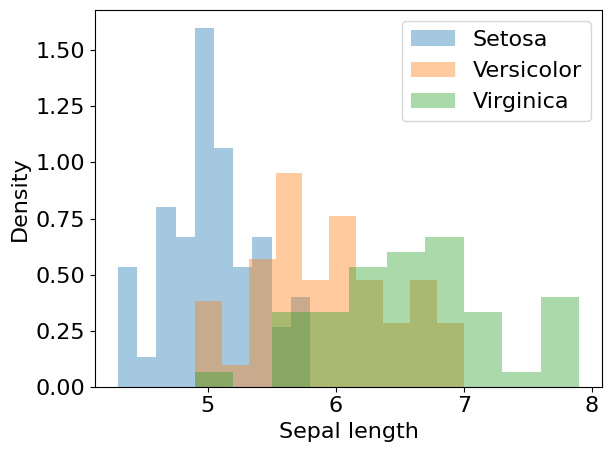

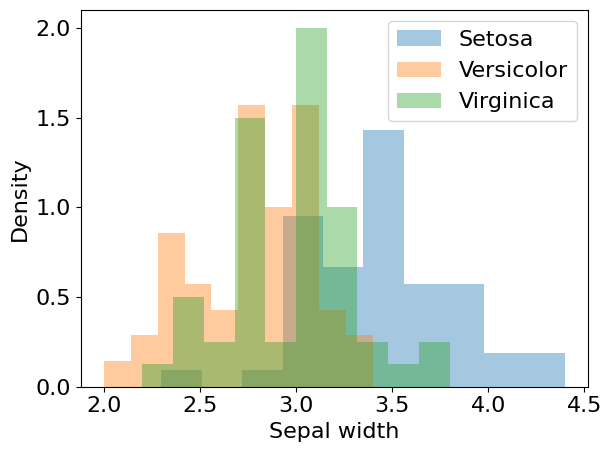

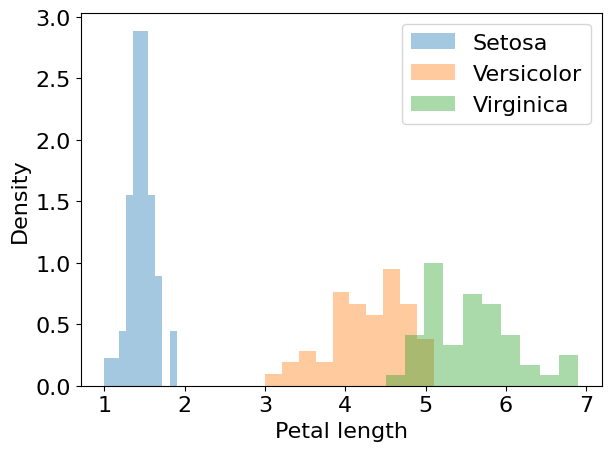

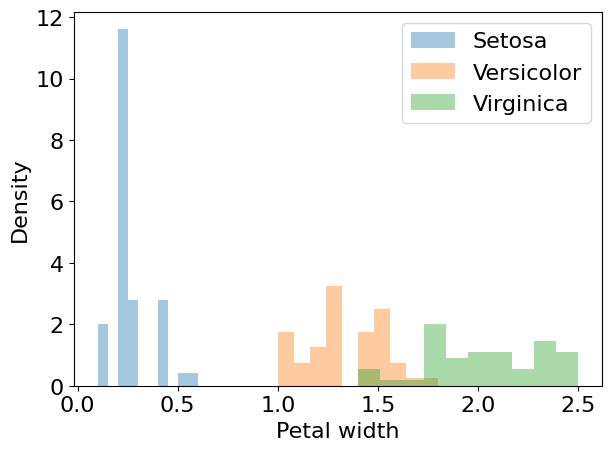

In [5]:
plot_hist(D, L)

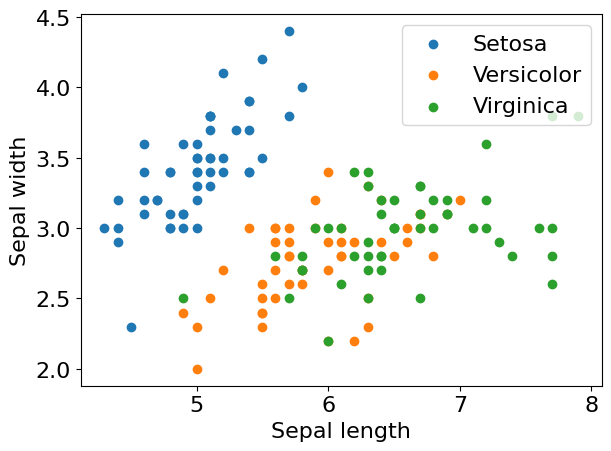

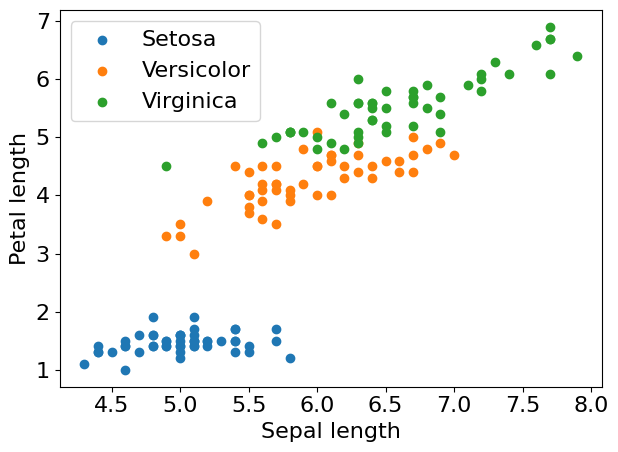

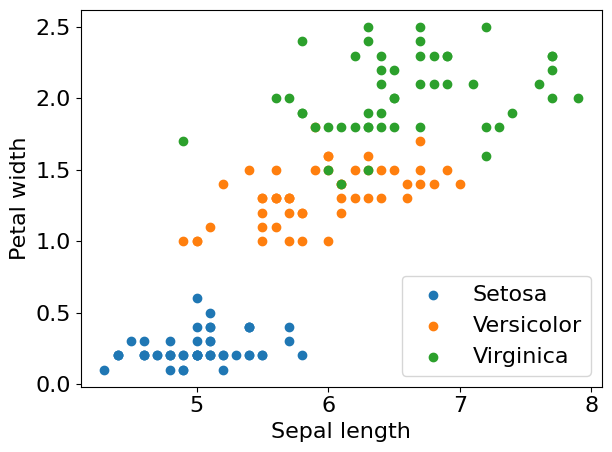

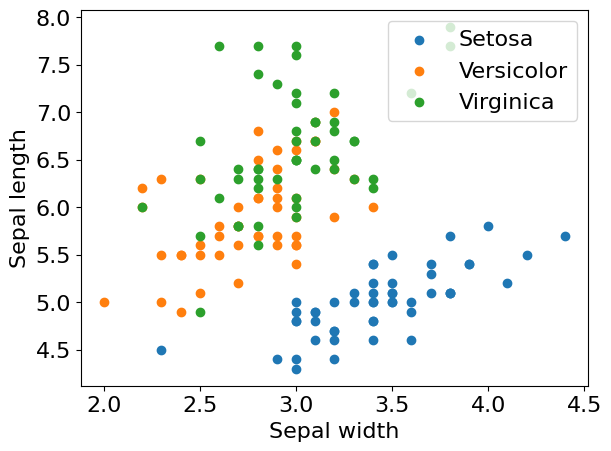

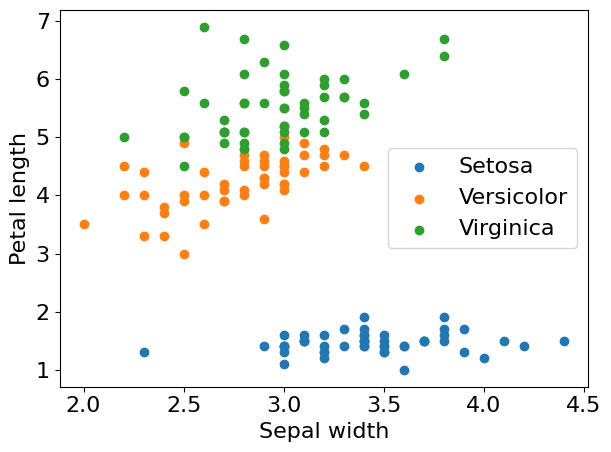

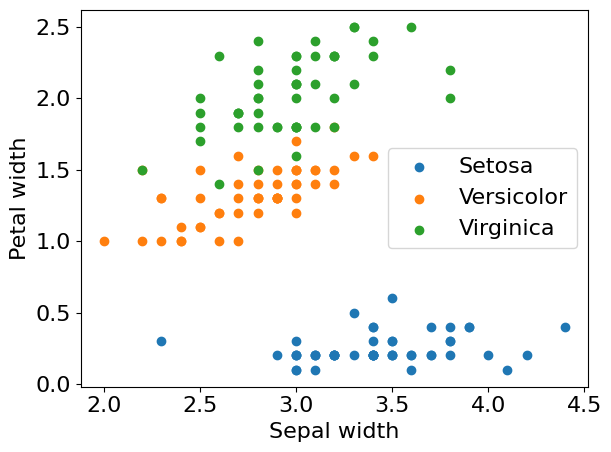

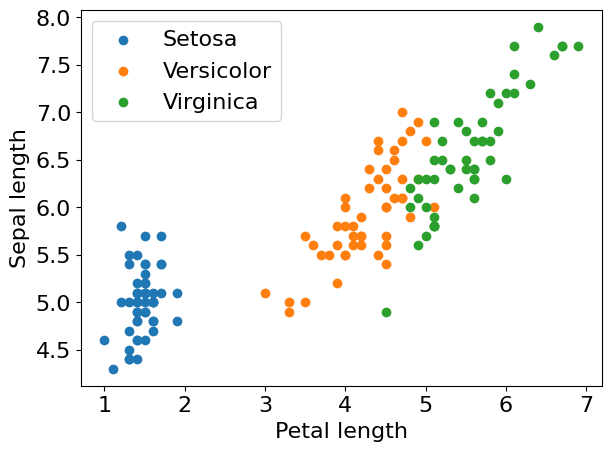

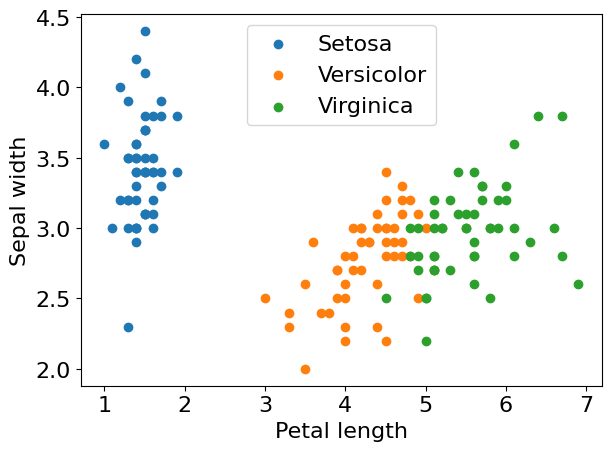

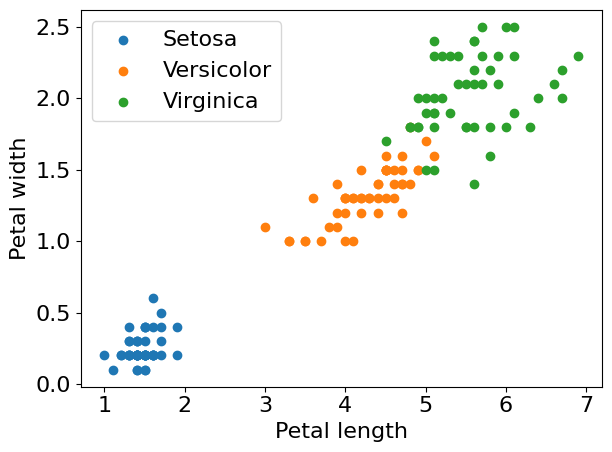

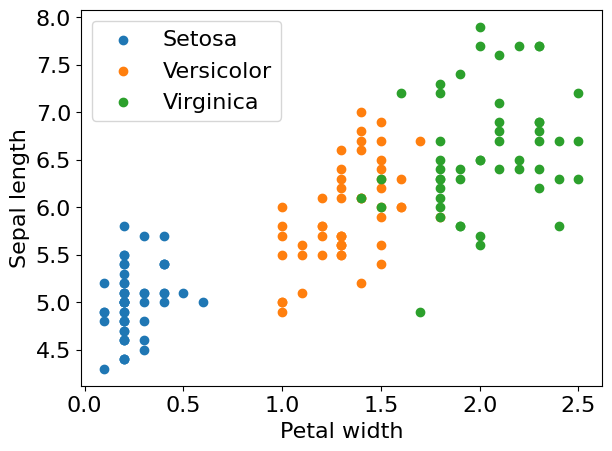

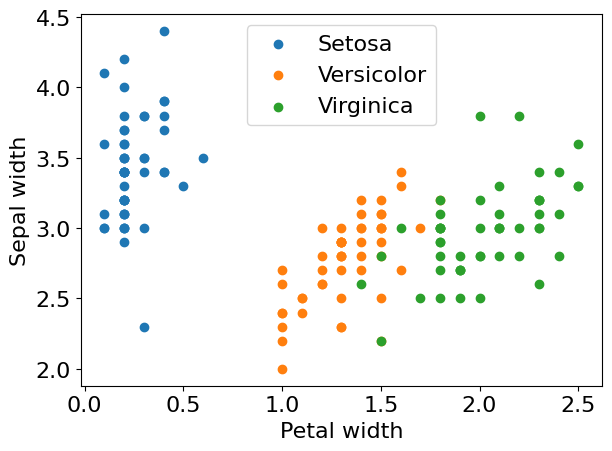

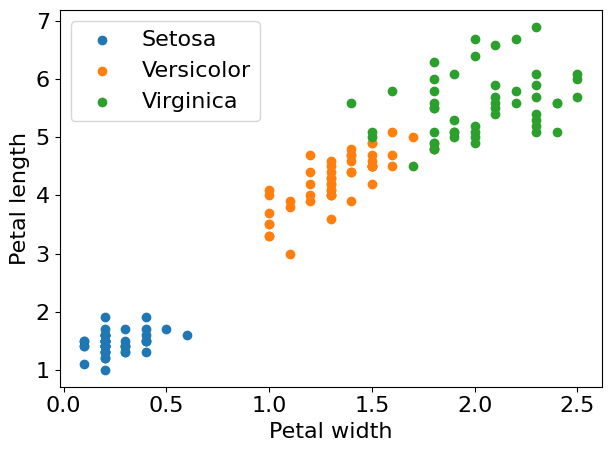

In [6]:
plot_scatter(D, L)

In [7]:
mu = D.mean(1).reshape((D.shape[0], 1))
print('Mean:')
print(mu)
print()

Mean:
[[5.84333333]
 [3.05733333]
 [3.758     ]
 [1.19933333]]



In [8]:
DC = D - mu

C = ((D - mu) @ (D - mu).T) / float(D.shape[1])
print('Covariance matrix:')
print(C)
print()

Covariance matrix:
[[ 0.68112222 -0.04215111  1.26582     0.51282889]
 [-0.04215111  0.18871289 -0.32745867 -0.12082844]
 [ 1.26582    -0.32745867  3.09550267  1.286972  ]
 [ 0.51282889 -0.12082844  1.286972    0.57713289]]



In [9]:
var = D.var(1)
std = D.std(1)
print('Variance:', var)
print('Std. dev.:', std)
print()

Variance: [0.68112222 0.18871289 3.09550267 0.57713289]
Std. dev.: [0.82530129 0.43441097 1.75940407 0.75969263]



In [10]:
for cls in [0,1,2]:
        print('Class', cls)
        DCls = D[:, L==cls]
        mu = DCls.mean(1).reshape(DCls.shape[0], 1)
        print('Mean:')
        print(mu)
        C = ((DCls - mu) @ (DCls - mu).T) / float(DCls.shape[1])
        print('Covariance:')
        print(C)
        var = DCls.var(1)
        std = DCls.std(1)
        print('Variance:', var)
        print('Std. dev.:', std)
        print()

Class 0
Mean:
[[5.006]
 [3.428]
 [1.462]
 [0.246]]
Covariance:
[[0.121764 0.097232 0.016028 0.010124]
 [0.097232 0.140816 0.011464 0.009112]
 [0.016028 0.011464 0.029556 0.005948]
 [0.010124 0.009112 0.005948 0.010884]]
Variance: [0.121764 0.140816 0.029556 0.010884]
Std. dev.: [0.34894699 0.37525458 0.17191859 0.10432641]

Class 1
Mean:
[[5.936]
 [2.77 ]
 [4.26 ]
 [1.326]]
Covariance:
[[0.261104 0.08348  0.17924  0.054664]
 [0.08348  0.0965   0.081    0.04038 ]
 [0.17924  0.081    0.2164   0.07164 ]
 [0.054664 0.04038  0.07164  0.038324]]
Variance: [0.261104 0.0965   0.2164   0.038324]
Std. dev.: [0.51098337 0.31064449 0.46518813 0.19576517]

Class 2
Mean:
[[6.588]
 [2.974]
 [5.552]
 [2.026]]
Covariance:
[[0.396256 0.091888 0.297224 0.048112]
 [0.091888 0.101924 0.069952 0.046676]
 [0.297224 0.069952 0.298496 0.047848]
 [0.048112 0.046676 0.047848 0.073924]]
Variance: [0.396256 0.101924 0.298496 0.073924]
Std. dev.: [0.62948868 0.31925538 0.54634787 0.27188968]

